[reference1](https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817)
[reference2](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)

In [100]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# plt.rcParams['figure.figsize'] = []

In [101]:
x_train = np.arange(0, 1001, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = 0.5*x_train + 50
# y_train = 0.5*x_train

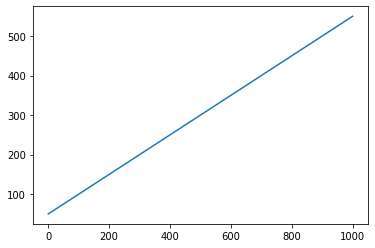

In [102]:
plt.plot(x_train, y_train)

In [103]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(x_train.reshape(-1,1))
scaler_y.fit(y_train.reshape(-1,1))
x_train = scaler_x.transform(x_train.reshape(-1, 1))
y_train = scaler_y.transform(y_train.reshape(-1, 1))

In [119]:
import torch 
from torch.autograd import Variable

class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_size=10) -> None:
        super(LinearRegression, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.activation =torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        self.softmax = torch.nn.Softmax()
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x
        # y = torch.nn.functional.relu(self.linear1(x))
        # y = torch.nn.ReLU(self.linear2(self.linear1(x)))

        # y = torch.nn.functional.relu(self.linear(x))
        # return y

In [124]:
input_dim = x_train.shape[1]
output_dim = 1
learning_rate = .00001
epochs = 100

model = LinearRegression(input_dim, output_dim)

### FOR GPU ###
if torch.cuda.is_available():
    model.cuda()

In [125]:
# set loss
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters())

In [126]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradient buffers
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    # get the loss
    loss = criterion(outputs, labels)
    print(loss)
    
    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print(f'epoch {epoch}, loss {loss.item()}')

C:\Users\PRIME\AppData\Local\Temp/ipykernel_62844/2341737555.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 0, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 1, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 2, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 3, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 4, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 5, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 6, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 7, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 8, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 9, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 10, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 11, loss 0.3334999680519104
tensor(0.3335, grad_fn=<MseLossBackward>)
epoch 12, loss 0.3334999680519104
tensor(0.3335, grad_fn

C:\Users\PRIME\AppData\Local\Temp/ipykernel_62844/2341737555.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


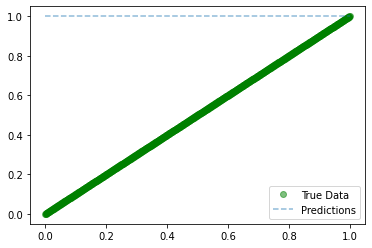

In [127]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)
    
plt.clf()
plt.plot(x_train, y_train, 'go', label="True Data", alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
# plt.plot(scaler_x.inverse_transform(x_train), scaler_y.inverse_transform(y_train), 'go', label="True Data", alpha=0.5)
# plt.plot(scaler_x.inverse_transform(x_train), scaler_y.inverse_transform(predicted), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [128]:
for param in model.parameters():
    print(param.data)

tensor([[ 0.0124],
        [-0.8131],
        [ 0.2804],
        [-0.9314],
        [ 0.4177],
        [-0.7774],
        [ 0.0218],
        [ 0.1745],
        [ 0.4361],
        [ 0.5410]])
tensor([ 0.9647, -0.3682,  0.9316, -0.6998, -0.5527,  0.3897, -0.4451, -0.9075,
         0.0506,  0.4465])
tensor([[ 0.2784,  0.2282, -0.2690,  0.2562,  0.1692,  0.1042, -0.0339, -0.2538,
          0.1654, -0.3112]])
tensor([0.1766])
tensor([[0.7029]])
tensor([0.2958])
